In [2]:

import pandas as pd
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
train =  pd.read_csv(r'C:\Users\jaleel\Downloads\Train_data.csv')
test =  pd.read_csv(r'C:\Users\jaleel\Downloads\test_data.csv')

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
names =  pd.read_csv(r'C:\Users\jaleel\Downloads\Train_data.csv')
print('The shape: %d x %d' % names.shape)
names.head(10)


The shape: 125973 x 42


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
6,0,icmp,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
7,0,icmp,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,icmp,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
9,0,icmp,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [5]:
print(test.head(4))

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   Unnamed: 0  duration protocol_type  service  flag  src_bytes  dst_bytes  \
0  202         0         icmp          25       4     0          0           
1  768         0         icmp          25       2     312        1856        
2  3753        0         icmp          25       2     245        2058        
3  20087       0         icmp          25       2     298        1267        

   land  wrong_fragment  urgent  ...  dst_host_srv_count  \
0  0     0               0       ...  255                  
1  0     0               0       ...  254                  
2  0     0               0       ...  255                  
3  0     0               0       ...  255                  

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0  1.0                     0.0                      
1  1.0                     0.0                      
2  1.0                     0.0                      
3  1.0                     0.0                      

   dst_host_same_src_port_rate  dst_host_s

In [6]:
# Descriptive statistics
train.describe()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,32.086288,2.575179,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,16.462574,1.141552,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,20.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,25.000000,2.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,50.000000,4.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,70.000000,11.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())


0    125973
Name: num_outbound_cmds, dtype: int64
0    10000
Name: num_outbound_cmds, dtype: int64


In [8]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [9]:
# Attack Class Distribution
train['xAttack'].value_counts()

normal    67343
dos       45927
probe     11656
r2l       995  
u2r       52   
Name: xAttack, dtype: int64

In [10]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [11]:
print('Training set:')
df = pd.read_csv(r"C:\Users\jaleel\Downloads\Train_data.csv", header=None, names = col_names)
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'duration' has 3138 categories
Feature 'protocol_type' has 4 categories
Feature 'service' has 126 categories
Feature 'flag' has 21 categories
Feature 'src_bytes' has 4497 categories
Feature 'dst_bytes' has 11717 categories
Feature 'land' has 5 categories
Feature 'wrong_fragment' has 7 categories
Feature 'urgent' has 7 categories
Feature 'hot' has 48 categories
Feature 'num_failed_logins' has 11 categories
Feature 'logged_in' has 5 categories
Feature 'num_compromised' has 102 categories
Feature 'root_shell' has 5 categories
Feature 'su_attempted' has 7 categories
Feature 'num_root' has 92 categories
Feature 'num_file_creations' has 48 categories
Feature 'num_shells' has 6 categories
Feature 'num_access_files' has 16 categories
Feature 'num_outbound_cmds' has 3 categories
Feature 'is_host_login' has 4 categories
Feature 'is_guest_login' has 5 categories
Feature 'count' has 951 categories
Feature 'srv_count' has 893 categories
Feature 'serror_rate' has 153 categories

In [12]:
print('Test set:')
df_test = pd.read_csv(r"C:\Users\jaleel\Downloads\test_data.csv", header=None, names = col_names)
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'duration' has 368 categories
Feature 'protocol_type' has 4 categories
Feature 'service' has 60 categories
Feature 'flag' has 11 categories
Feature 'src_bytes' has 769 categories
Feature 'dst_bytes' has 2112 categories
Feature 'land' has 3 categories
Feature 'wrong_fragment' has 4 categories
Feature 'urgent' has 4 categories
Feature 'hot' has 14 categories
Feature 'num_failed_logins' has 5 categories
Feature 'logged_in' has 3 categories
Feature 'num_compromised' has 11 categories
Feature 'root_shell' has 3 categories
Feature 'su_attempted' has 3 categories
Feature 'num_root' has 8 categories
Feature 'num_file_creations' has 7 categories
Feature 'num_shells' has 4 categories
Feature 'num_access_files' has 4 categories
Feature 'num_outbound_cmds' has 2 categories
Feature 'is_host_login' has 3 categories
Feature 'is_guest_login' has 3 categories
Feature 'count' has 445 categories
Feature 'srv_count' has 367 categories
Feature 'serror_rate' has 74 categories
Feature 'srv_

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
col = test.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf  = pd.DataFrame(sc_test, columns = col)

In [14]:
#categorical values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type'] 
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

,protocol_type
0,protocol_type
1,icmp
2,udp
3,icmp
4,icmp


In [15]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# put together
dumcols=unique_protocol2
print(dumcols)

#do same for test set
unique_service_test=sorted(test.protocol_type.unique())
testdumcols=unique_protocol2 

['Protocol_type_icmp', 'Protocol_type_protocol_type', 'Protocol_type_tcp', 'Protocol_type_udp']


In [16]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type
0  1            
1  0            
2  3            
3  0            
4  0            


In [17]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_protocol_type,Protocol_type_tcp,Protocol_type_udp
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [18]:
#SCALING NUMERICAL ATTRIBUTES
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
col = test.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf  = pd.DataFrame(sc_test, columns = col)

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['xAttack'], axis=1)
cat_Ytrain = traincat[['xAttack']].copy()

In [20]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['xAttack']
train_x.shape

(125973, 40)

In [21]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(10000, 42)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


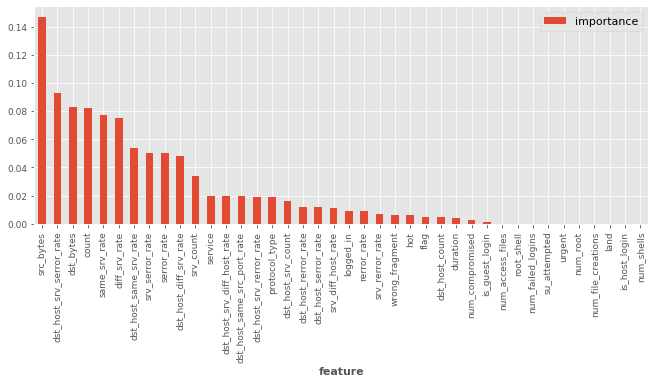

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [23]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['service',
 'src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'protocol_type']

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

In [27]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);
# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

# Train SVM model
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(X_train,Y_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.05, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [28]:
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print() 
    print("Classification report:" "\n", classification) 
    print()


============================== SVM Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9909050479535724

Model Accuracy:
 0.9919370385910797

Confusion matrix:
 [[32066    92     2     0     0]
 [   43 46924   160    82     2]
 [    3   195  7875     0     0]
 [    3   114     1   588     0]
 [    0    11     1     2    17]]

Classification report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00     32160
      normal       0.99      0.99      0.99     47211
       probe       0.98      0.98      0.98      8073
         r2l       0.88      0.83      0.85       706
         u2r       0.89      0.55      0.68        31

    accuracy                           0.99     88181
   macro avg       0.95      0.87      0.90     88181
weighted avg       0.99      0.99      0.99     88181



============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validati